**Proyecto Final - Redes Neuronales Convolucionales - Butterfly Image Classification**

**Autores: Cristian Andrés Velandia Montaño - 20241595012**

**Mayer Santiago Beltran Romero - 20241695002**

El conjunto de datos incluye 75 clases diferentes de mariposas. El conjunto de datos contiene más de 1.000 imágenes etiquetadas, incluidas las imágenes de validación. Cada imagen pertenece a una sola categoría de mariposas.

Las etiquetas de cada imagen se guardan en Training_set.csv.

El archivo Testing_set.csv contiene los nombres de las imágenes de la carpeta de prueba, que debe predecir la etiqueta y enviar a Data Sprint 107 - Clasificación de imágenes de mariposas.

Traducción realizada con la versión gratuita del traductor DeepL.com

In [1]:
from google.colab import drive
from google.colab import auth
auth.authenticate_user() # Authenticate the user before attempting to mount the drive
drive.mount('/content/drive/') # Mount the drive


Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/butterflies

/content/drive/MyDrive/butterflies


In [3]:
!git clone https://github.com/IDEA-Research/GroundingDINO.git

%cd GroundingDINO/

!pip install -q -e .

!pip install supervision

fatal: destination path 'GroundingDINO' already exists and is not an empty directory.
/content/drive/MyDrive/butterflies/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 16.0 MB/s eta 0:00:00


In [4]:
!mkdir weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth -P weights

mkdir: cannot create directory ‘weights’: File exists


In [5]:
!dir


build	    docker_test.py    groundingdino.egg-info  requirements.txt	weights
demo	    environment.yaml  LICENSE		      setup.py
Dockerfile  groundingdino     README.md		      test.ipynb


In [6]:
from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model("/content/drive/MyDrive/butterflies/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py",
     "weights/groundingdino_swint_ogc.pth")

final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

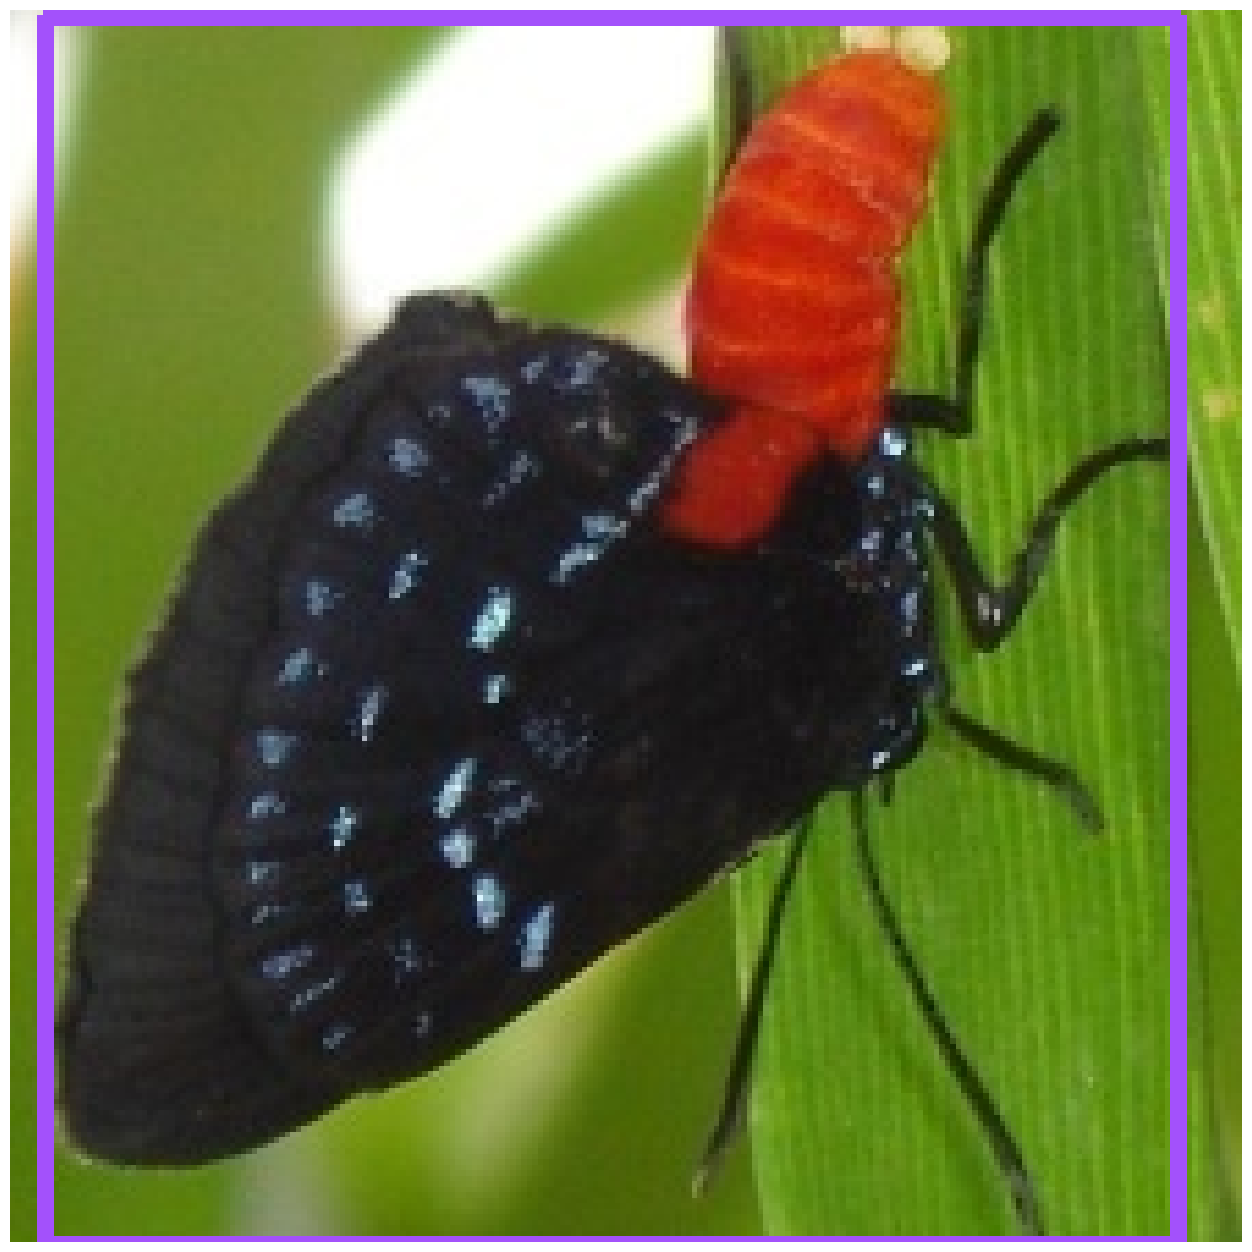

In [7]:
import os
import supervision as sv
image_path="/content/drive/MyDrive/butterflies/train/Image_6499.jpg"
text="Butterfly"
BOX_THRESHOLD = 0.26
TEXT_TRHESHOLD = 0.30
image_source, image = load_image(image_path)
boxes, logits,  phrases = predict(
    model=model,
    image=image,
    caption=text,
    box_threshold=BOX_THRESHOLD,
    text_threshold=TEXT_TRHESHOLD,
    device='cuda'
)
annotated_frame = annotate(
    image_source=image_source,
    boxes=boxes,
    logits=logits,
    phrases=phrases)

sv.plot_image(annotated_frame,(16,16))